# 1. Distribution Plots

Used to visualize the spread and shape of numerical data.

## Distribution Plot Types:

- histplot
- jointplot
- pairplot
- rugplot
- kdeplot (Kernel Density Estimation)

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [61]:
%matplotlib inline

Seaborn comes with some built-in datasets:

In [63]:
tips = sns.load_dataset('tips')

In [65]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Histplot

Distplot shows the distribution of a univariate set of observations. It is used to create histograms which help visualize data distribution

It has arguments like:
- `bins` - sets the number of groups.
- `kde` - adds a smooth curve to shsow the overall trend if True. Otherwise, it will be False.

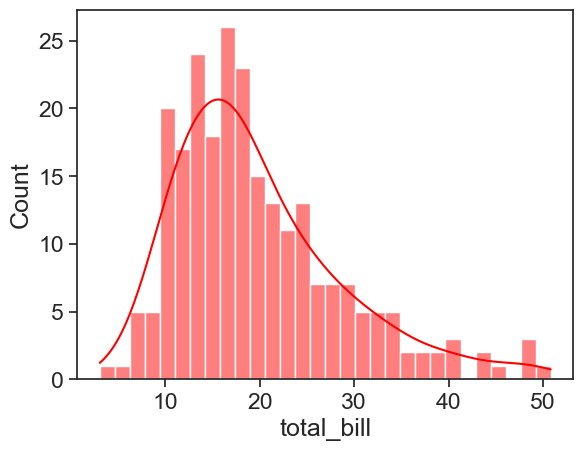

In [432]:
sns.histplot(tips['total_bill'], bins = 30, kde = True)
plt.show()

## Jointplot

Helps visualize the relationship between two sets of data while also showing their individual distributions. It is a function that creates a scatter plot and a histogram on the sides. <br>
It has a few arguments:
- `x` - shows the variable we're comparing on the x-axis.
- `y` - shows the variable we're comparing on the y-axis.
- `kind` - the type of distribution e.g. hex, scatter, reg etc.
- `data` - the source of the distribution.

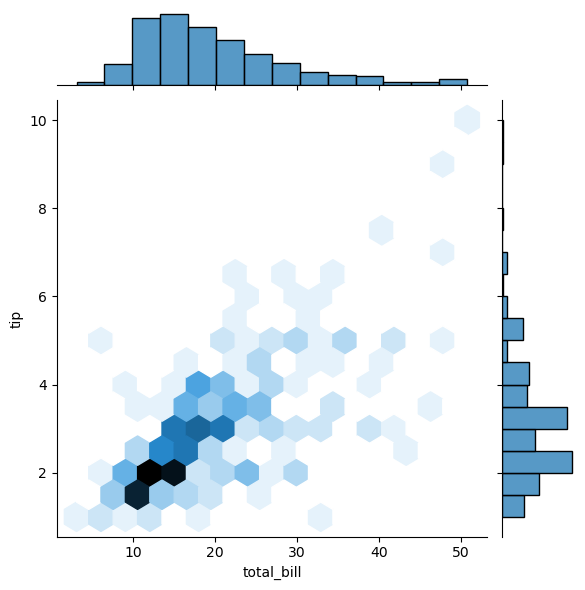

In [74]:
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'hex')
plt.show()

## Pairplot

Creates multiple scatterplots and histograms for all numerical variables in a dataset. It creates a plot for every pair of variables.

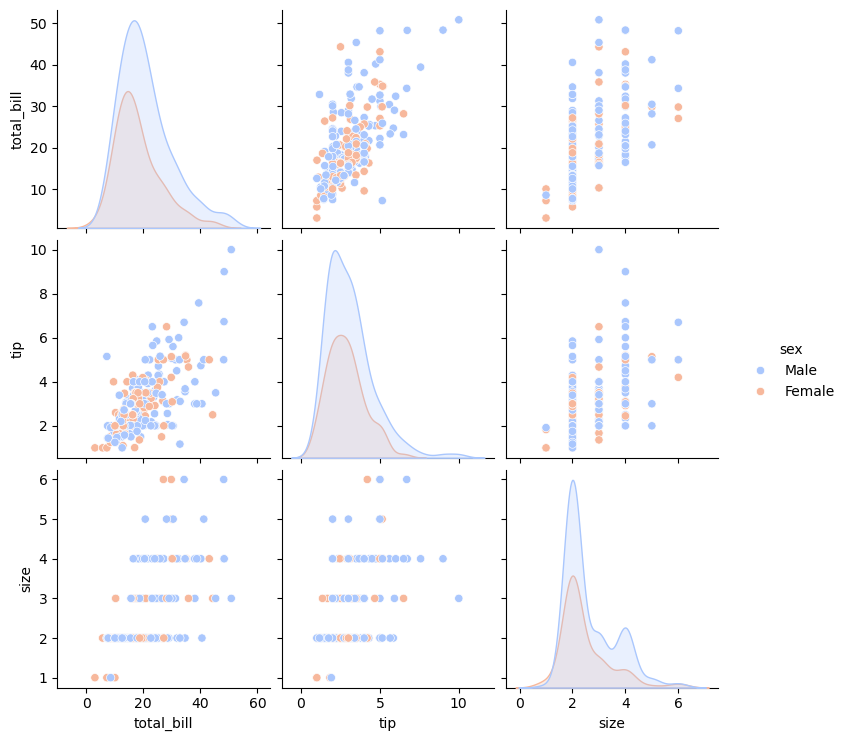

In [79]:
sns.pairplot(tips, hue = 'sex', palette = 'coolwarm') # hue colors the categorical columns
plt.show()

## Rugplot

Shows the distribution of a univariate dataset by drawing small vertical lines along an axis.

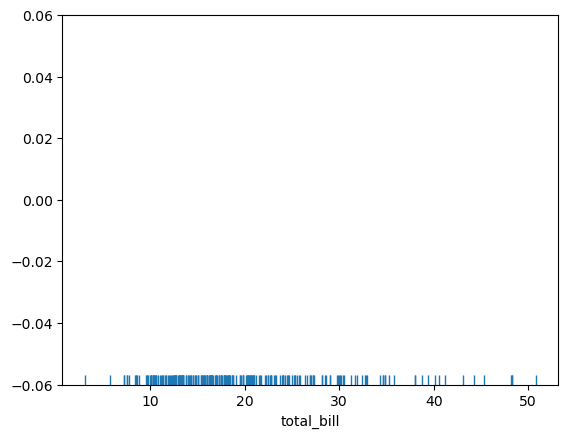

In [82]:
sns.rugplot(tips['total_bill'])
plt.show()

## Kdeplot

Shows the overall pattern of a `rugplot()` by using a smooth curve over its points. It is the sum of all the normal distribution around a rug plot.

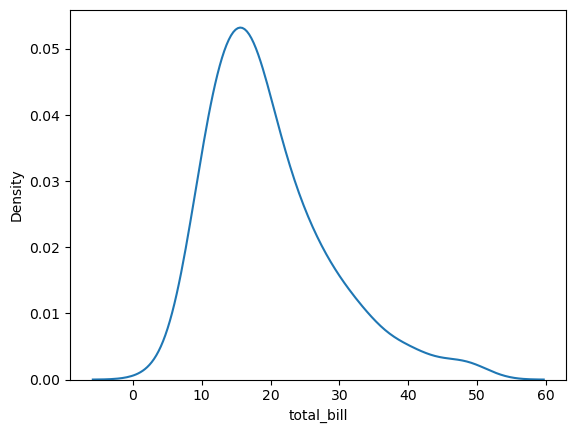

In [85]:
sns.kdeplot(tips['total_bill'])
plt.show()

# 2. Categorical Plots

These are used for visualizing the relationship between categorical and numerical data.

Categorical data is a data that represents groups or categories rather than numerical values.

## Types of Categorical Data

## barplot

They are used to create plots that show aggregated values (e.g. mean, median, std) for categorical data.

In [111]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


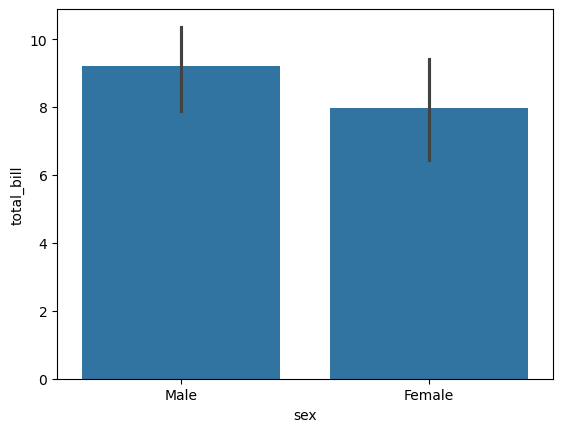

In [122]:
sns.barplot(x = 'sex', y = 'total_bill', data = tips, estimator = np.std) # The default estimator is the mean
plt.show()

## countplot

Similar to a `barplot()` but the estimator counts the number of occurrences.

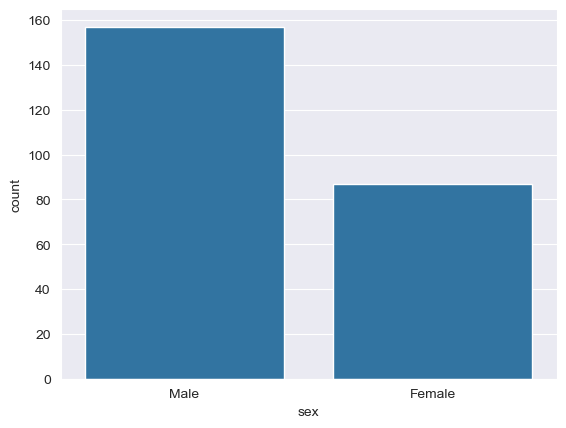

In [386]:
sns.countplot(x = 'sex', data = tips) # This shows the total number of male and females as a plot.
plt.show()

## boxplot

Used for displaying distribution, spread and outliers of data

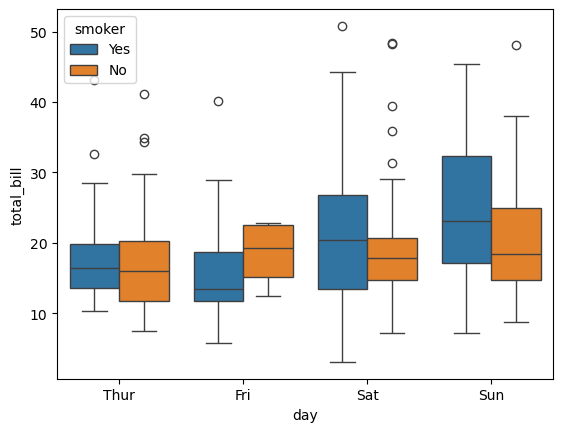

In [142]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker') # hue splits the plot by another differentiation
plt.show()

The data points above the whisker are the outliers which is are usually >1.5 x the value of the upper quartile or <1.5 x the value of the lower quartile. <br>
A box and whisker is measured in percentage making it 100% in total.

## violinplot

Similar to `boxplot()` but summarizes distribution using shape and density showing the KDE of the underlying distribution.

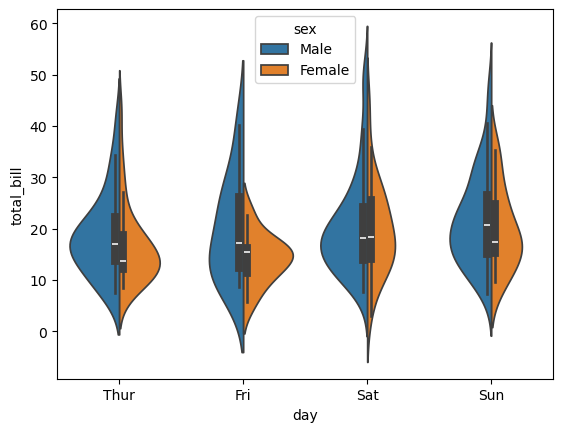

In [147]:
sns.violinplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', split = True) # the split = True argument divides one violin into two halves rather than using two violins for distribution.
plt.show()

## stripplot

This is a scatterplot where one variable is categorical.

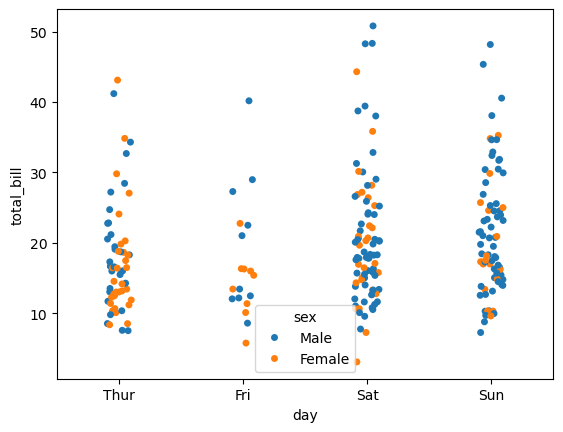

In [174]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = True, hue = 'sex') # The jitter = True argument reduces overlap
plt.show()

## swarmplot

This is a combination of a `stripplot()` and `violinplot()`. Unlike a `stripplot()`, its points do not overlap. Are not good very large datasets.

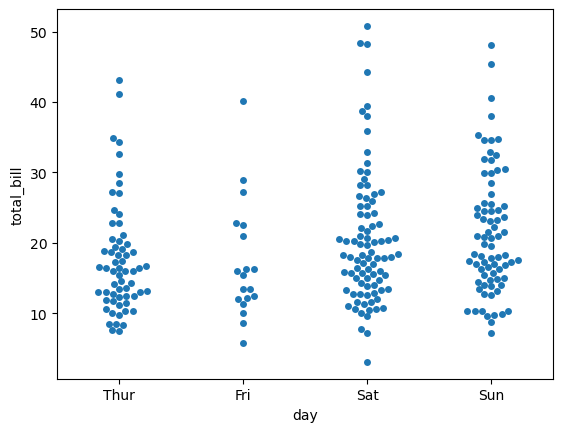

In [172]:
sns.swarmplot(x = 'day', y = 'total_bill', data = tips)
plt.show()

## catplot

This is a more general plot used for categorical data. It allows visualization of categorical variables using different plots like bar, box, violin plots etc. <br>
It has a `kind` argument which specifies the type of plot to be used for visualization.

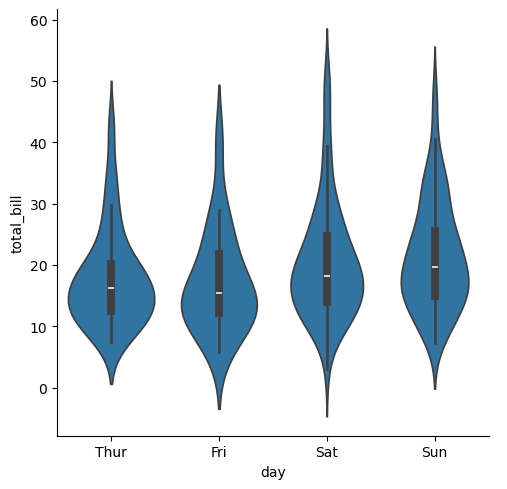

In [183]:
sns.catplot(x = 'day', y = 'total_bill', data = tips, kind = 'bar')
plt.show()

# 3. Matrix Plot

Matrix plot is used to visualize relationships between multiple variables in a grid-like format. It is useful when dealing with correlation matrices, confusion matrices or large datasets with numerical relationships. It has different types: <br>
-`sns.heatmap()` <br>
-`sns.clustermap()`

In [193]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

This visualizes 2D data using colors.

In [222]:
t_corr = tips.select_dtypes(include=['number']).corr() # Computes correlation only for numeric values
t_corr # Shows the correlation of numeric variables

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


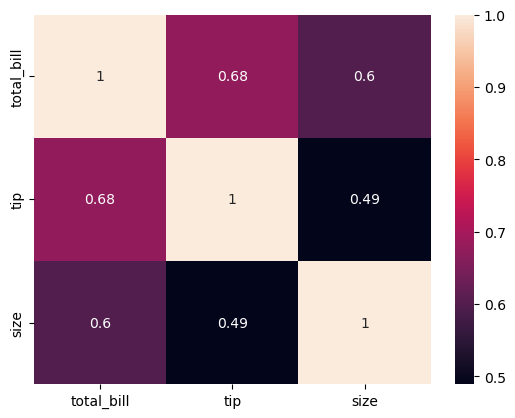

In [224]:
sns.heatmap(t_corr, annot = True) # The annot argument shows the actual correlation values in the heatmap
plt.show()

You can convert data to a matrix format by using `pivot_table()` which is done below with the flights dataset. 

In [243]:
# The pivot_table() is used to reshape data in a table
f_piv = flights.pivot_table(index = "month", columns = "year", values = "passengers") 
f_piv

C:\Users\akpan\AppData\Local\Temp\ipykernel_21912\1358878983.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  f_piv = flights.pivot_table(index = "month", columns = "year", values = "passengers")


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


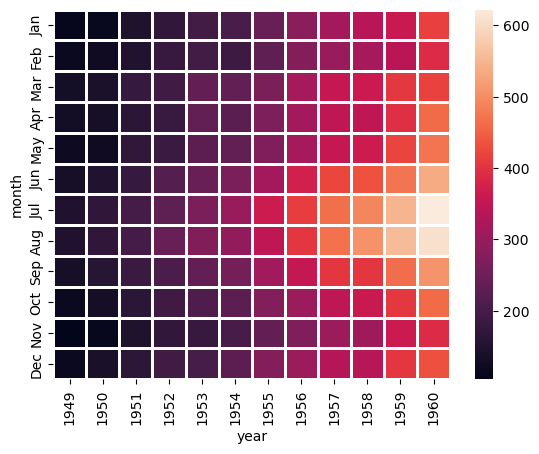

In [253]:
sns.heatmap(f_piv, linecolor = 'white', linewidths = 1)
plt.show()

## Clustermap

Performs hierarchical clustering on matrix data.

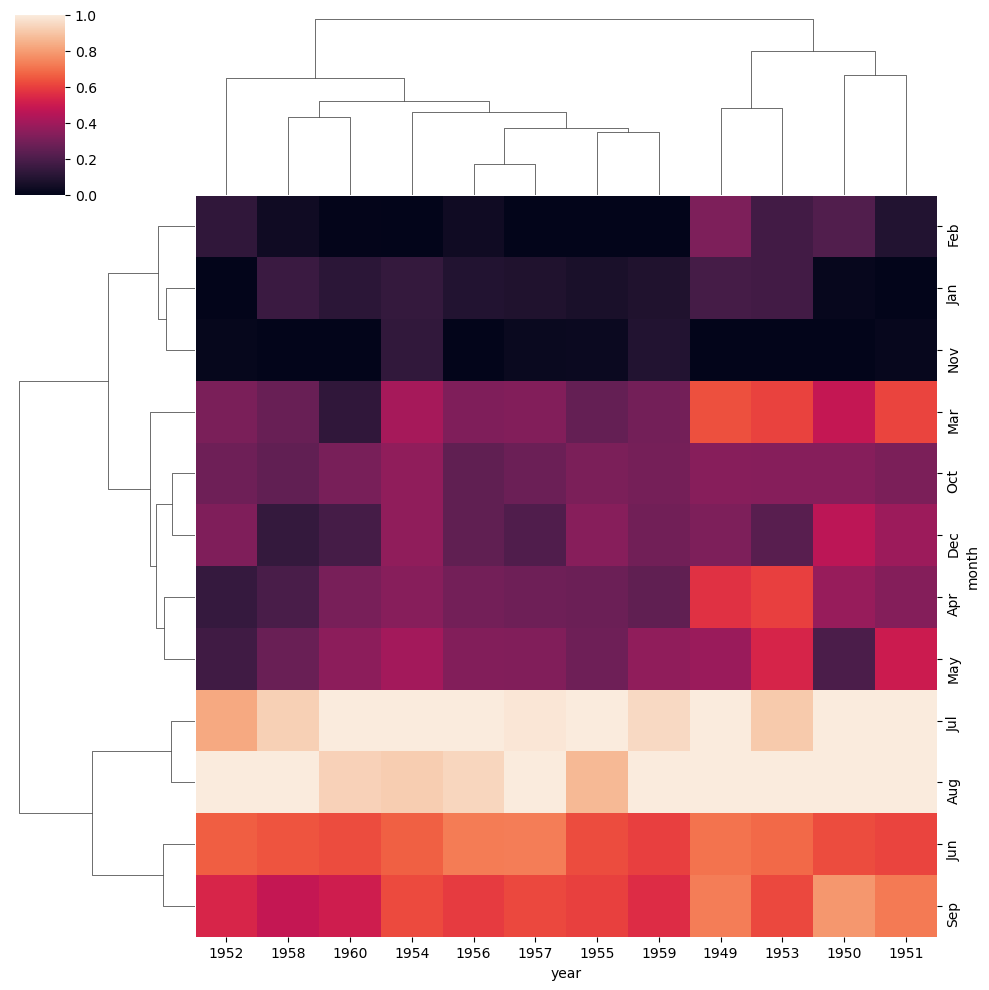

In [283]:
sns.clustermap(f_piv, standard_scale = 1) # standard_scale normalizes the columns so the values range from 0-1. The highest passenger total in a year column will be 1, while the lowest will be 0.
plt.show()

It shows columns and rows that are similar to eachother and in a hierarchy

# 4. Grids

In [288]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [316]:
iris['species'].nunique() # Number of unique values in species column

3

## PairGrid

`PairGrid()` gives one more control of the plots unlike `pairplots`. It uses the methods like `map()`, `map_diag()`, `map_upper()`, `map_lower()` to control the plots used in specific areas of the grid

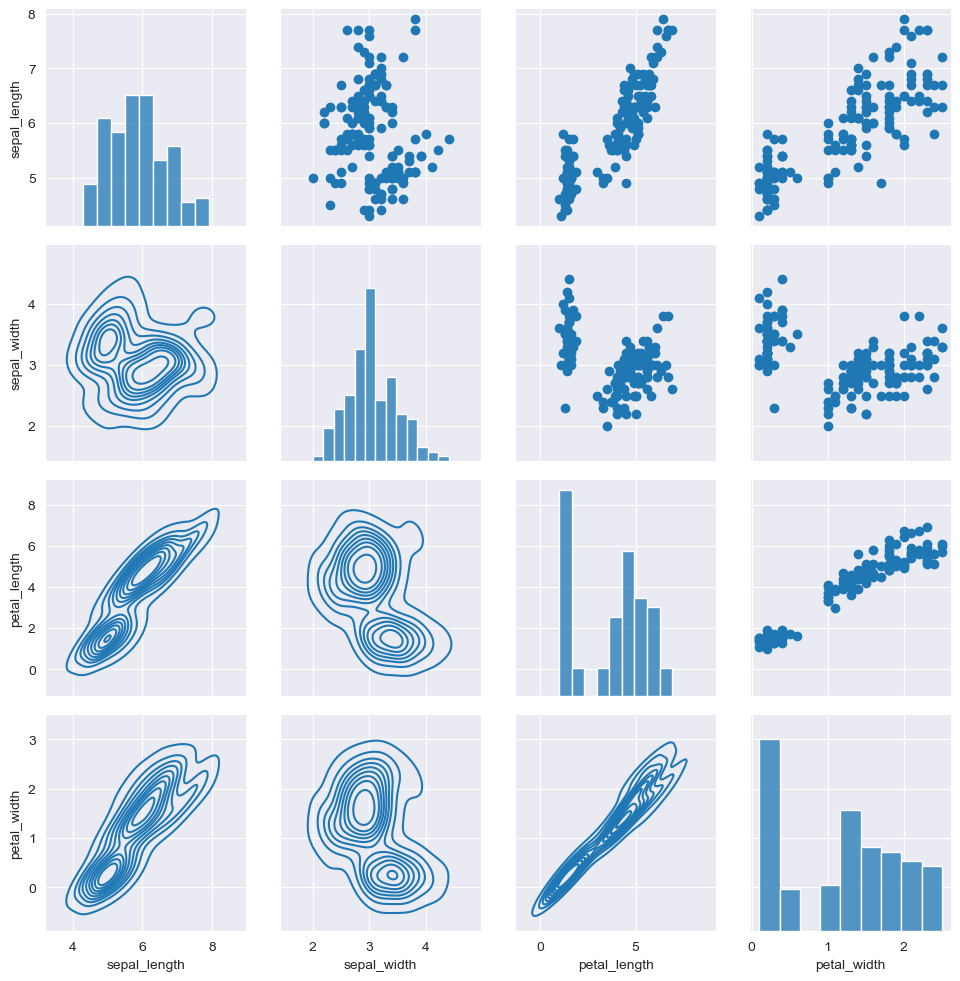

In [312]:
sns.set_style('darkgrid') # sets grid
g = sns.PairGrid(iris) # gives more control over the plots
g.map_diag(sns.histplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
plt.show()

## FacetGrid

`FacetGrid` is useful when you want the same kind of plot but divided by categories.<br>
The code below creates a subplot of two rows (smoker or no smoker) and 2 columns (lunch or dinner) and distributes them by their total bills.

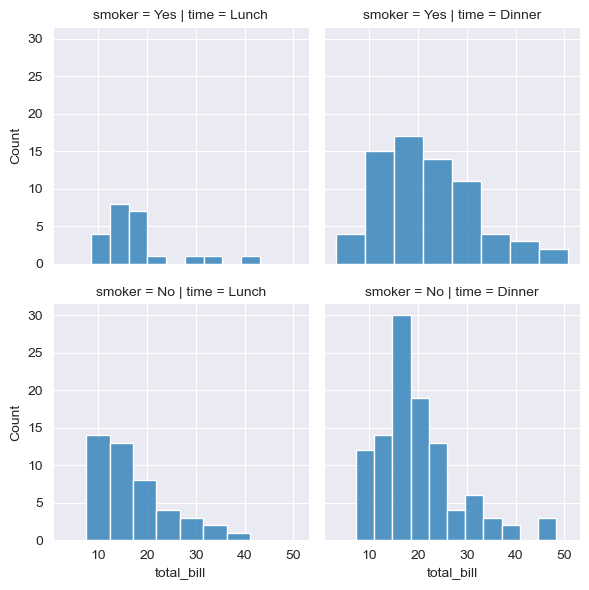

In [336]:
tips = sns.load_dataset('tips')
g = sns.FacetGrid(data = tips, row = 'smoker', col = 'time')
g.map(sns.histplot, 'total_bill')
plt.show()

# 5. Regression Plots

In [340]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot (Linear Model Plot)

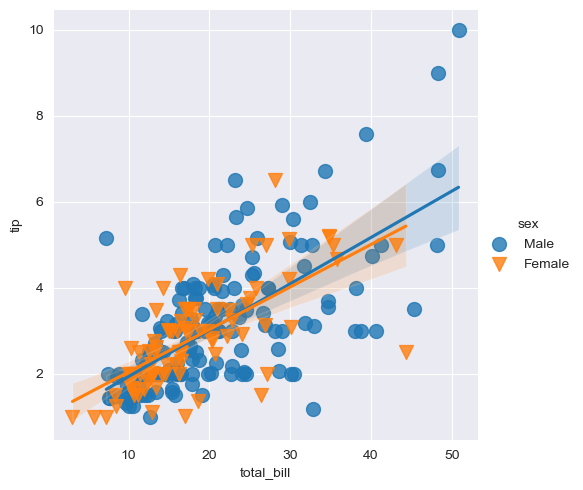

In [348]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v'], scatter_kws = {'s': 100})
plt.show()

You can create subplots of rows and columns using `lmplot()` just like with `FacetGrid()`

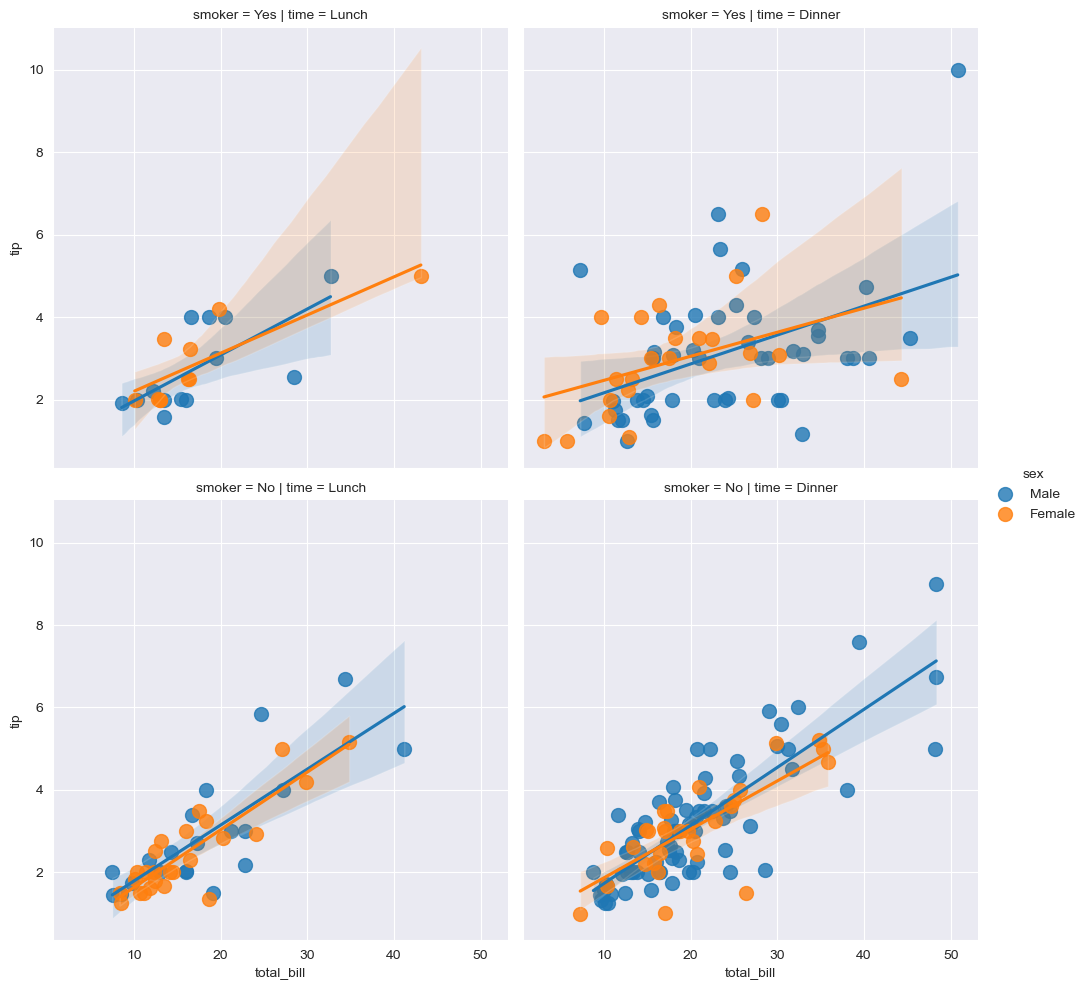

In [381]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'time', row = 'smoker', scatter_kws = {'s': 100}, hue = 'sex', aspect = 1)
plt.show()

# 6. Style and Color

## Add borders to a graph

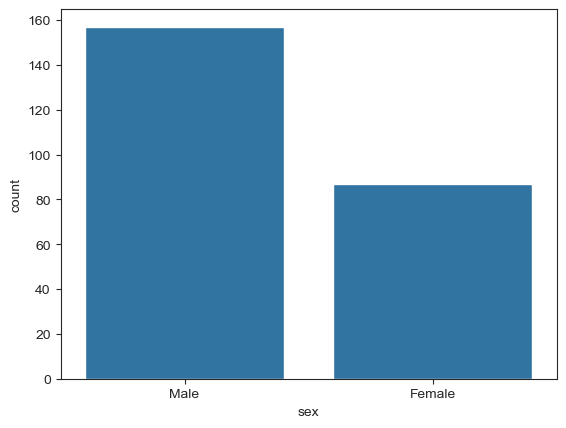

In [393]:
sns.set_style('ticks') # Adds axis borders
sns.countplot(x = 'sex', data = tips) 
plt.show()

## Remove the borders

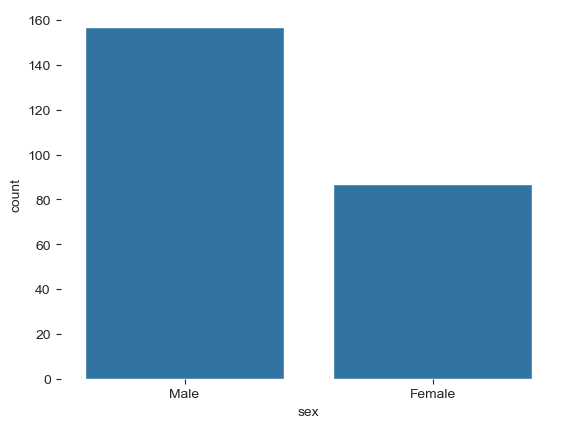

In [402]:
sns.countplot(x = 'sex', data = tips) 
sns.despine(top = True, right = True, bottom = True, left = True) # remove all the axis borders
plt.show()

## Size and Context

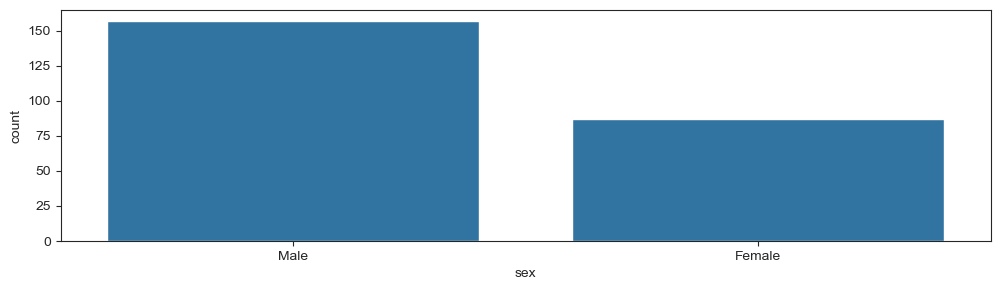

In [405]:
plt.figure(figsize = (12,3)) # seaborn calls matplotlib which sets the figure size
sns.countplot(x = 'sex', data = tips) 
plt.show()

`set_context` allows you to override default parameters and change font scale depending on what you are creating the figure for.

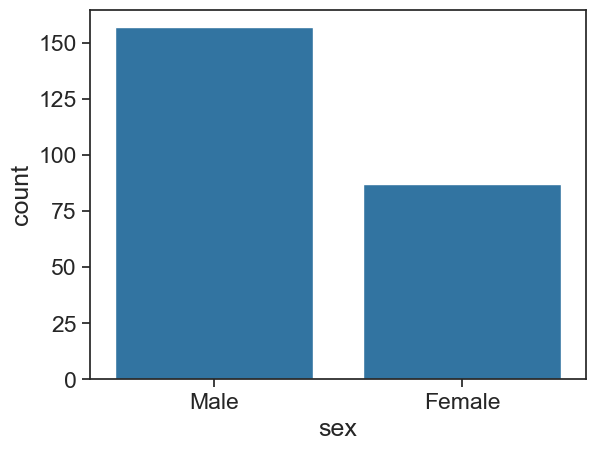

In [420]:
sns.set_context('notebook', font_scale = 1.5) # font_scale scales it in case it's still not the size we want
sns.countplot(x = 'sex', data = tips) 
plt.show()

## Palette and Colors

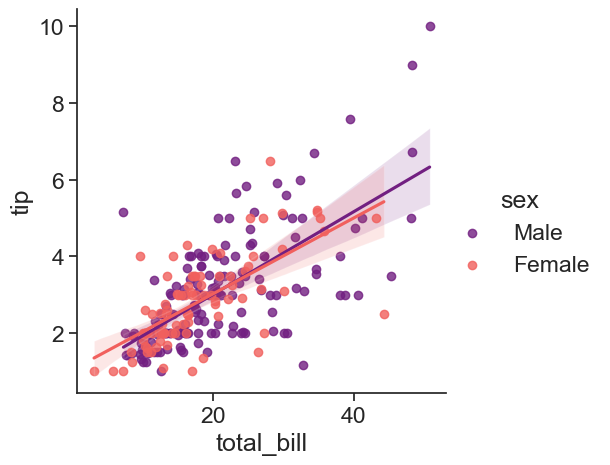

In [430]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'magma')
plt.show()